# Task 2

## Integrantes

- Sergio Orellana 221122
- Rodrigo Mansilla 22611
- Ricardo Chuy 221007

En sta parte se busca que usted implemente un sistema de correspondencia completo. Para esto debe escribir un script en Python usando OpenCV. No se provee código base, debe estructurarlo usted mismo. Para esta parte debe crear su propia imagen a usar para esto:
* Tome dos fotografías propias de un objeto con textura (i.e. una caja de cereral, una portada de libro, un edificio)
* Foto 1: Vista frontal
* Foto 2: Vista rotada (aproximadamente 45 grados) y con cambio de escala (aléjese o haga zoom). El cambio debe ser evidente

Con esto haga lo siguiente en su código
1. Cargue ambas imágenes en escala de grises
2. Implemente la detección y descripción usando SIFT.
3. Implemente la detección y descripción usando ORB.
4. Realice la parte de Matching:
a. Para SIFT: Utilice BFMatcher con normal L2 (Euclidiana)
b. Para ORB: Utilice BFMatches con norma de Hamming
5. Implemente Lowe’s Ratio Test para ambos algoritmos
a. Debe filtrar los matches donde la distancia del mejor vecino sea mayor a 0.75 x la distancia
del segundo mejor vecino
6. Genere una imagen final donde se dibujen las líneas de correspondencia solamente de los “buenos
matches” (inliers) tras el filtro.

## Carga de imagenes

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import time

In [25]:
try:
    # Intenta cargar imágenes reales
    img1 = cv2.imread('./imgs/cereal_normal.jpg', cv2.IMREAD_GRAYSCALE) # Referencia
    img2 = cv2.imread('./imgs/cereal_rotado.jpg', cv2.IMREAD_GRAYSCALE) # Rotada 45 grados
    
    if img1 is None or img2 is None:
        raise FileNotFoundError("No se encontraron las imágenes.")

except Exception as e:
    print("error")

## Implementacion de identificacion y descripcion usando SIFT

In [26]:
def mostrar_matches(img1, kps1, img2, kps2, matches, nombre_algo):
    # para ver resultados

    # cv2.drawMatches es loque hace las líneas conectando los puntos clave
    img_matches = cv2.drawMatches(img1, kps1, img2, kps2, matches, None, 
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(img_matches)
    plt.title(f"{nombre_algo}: {len(matches)} Matches Buenos")
    plt.axis('off')
    plt.show()

In [27]:
def filtrar_matches_lowe(matches_crudos, ratio=0.75):
    #Aplica el Ratio Test de David Lowe. Solo acepta un match si la distancia del mejor candidato (m) 
    # es considerablemente menor que la del segundo mejor (n).
    
    buenos_matches = []
   
    for m, n in matches_crudos:
        if m.distance < ratio * n.distance:
            buenos_matches.append(m)
    return buenos_matches

In [ ]:
def ejecutar_sift(img_original, img_alterada, ratio_lowes):
    detector = cv2.SIFT_create()

    puntos_clave_original, descriptor_1 = detector.detectAndCompute(img_original, None)
    puntos_clave_alterado, descriptor_2 = detector.detectAndCompute(img_alterada, None)

    if descriptor_1 is None or descriptor_2 is None:
        print("Error: SIFT no encontró descriptores.")
        return
    
    matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    raw_matches = matcher.knnMatch(descriptor_1, descriptor_2, k=2)

    good_matches = filtrar_matches_lowe(raw_matches, ratio_lowes)

    print(f"Keypoints Ref: {len(puntos_clave_original)} | Keypoints alterado: {len(puntos_clave_alterado)}")
    print(f"Matches Totales: {len(raw_matches)} | Buenos: {len(good_matches)}")

    mostrar_matches(img_original, puntos_clave_original, img_alterada, puntos_clave_alterado, good_matches, "SIFT")

Keypoints Ref: 15922 | Keypoints Query: 12736
Matches Totales: 15922 | Buenos: 2876


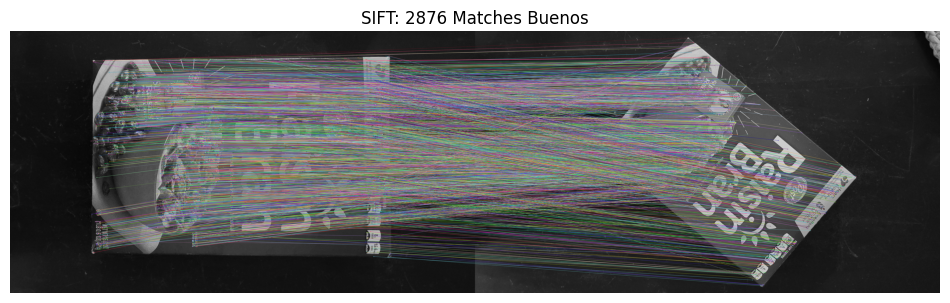

In [29]:
ratio_lowes = 0.75

ejecutar_sift(img1, img2, ratio_lowes)

## Implementacion de identificacion y descripcion usando SIFT

In [ ]:

def ejecutar_orb(img_original, img_alterada, ratio_lowes):
    detector = cv2.ORB_create(nfeatures=2000)

    # deteccion y descrpcion
    puntos_clave_original, descriptor1 = detector.detectAndCompute(img_original, None)
    puntos_clave_alteardo, descriptor2 = detector.detectAndCompute(img_alterada, None)

    if descriptor1 is None or descriptor2 is None:
        print("Error: ORB no encontró descriptores.")
        return
    

    # aqui es el matching, pero es un poco diferente ya que para ORB se usa Hamming al ser binario.
    matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck = None)


    # pendiente de seguir jeje


In [ ]:
ratio_lowes = 0.75
ejecutar_orb(img1, img2, ratio_lowes)